Nguồn dữ liệu: https://www.kaggle.com/datasets/rishidamarla/amazoncom-fashion-products/data

## Cài đặt thư viện

In [ ]:
!pip install wordcloud

In [ ]:
!pip install kmodes

In [ ]:
import re
import ast
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from wordcloud import WordCloud, STOPWORDS
from sklearn.preprocessing import LabelEncoder
from kmodes.kprototypes import KPrototypes
pd.options.display.max_rows = None
pd.options.display.max_columns = None

## Đọc dữ liệu

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Course DA/Final Project/amazon_co-ecommerce_sample.csv')
df.head()

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ..."
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,NaN,2,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ..."
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2 new,17,2.0,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel..."
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,£39.99,NaN,1,2.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,NaN,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,NaN,NaN,I love it // 5.0 // 22 July 2013 // By\n \n...,NaN
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,NaN,3,2.0,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,NaN,Birthday present // 5.0 // 14 April 2014 // By...,NaN


## Bước 1: Tạo từ điển dữ liệu và đánh giá chất lượng dữ liệu

### Thông tin về dữ liệu

In [ ]:
print('Số dòng: ', df.shape[0])
print('Số cột: ', df.shape[1])

Number of rows:  10000
Number of columns:  17


In [ ]:
df.dtypes

,0
uniq_id,object
product_name,object
manufacturer,object
price,object
number_available_in_stock,object
number_of_reviews,object
number_of_answered_questions,float64
average_review_rating,object
amazon_category_and_sub_category,object
customers_who_bought_this_item_also_bought,object


In [ ]:
numerics_df = df.select_dtypes(include = np.number)
variable_df = df.select_dtypes(include = 'object')
print('Cột dữ liệu số: ',numerics_df.columns)
print('Cột dữ liệu phân loại: ', variable_df.columns)

digital data columns:  Index(['number_of_answered_questions'], dtype='object')
category data:  Index(['uniq_id', 'product_name', 'manufacturer', 'price',
       'number_available_in_stock', 'number_of_reviews',
       'average_review_rating', 'amazon_category_and_sub_category',
       'customers_who_bought_this_item_also_bought', 'description',
       'product_information', 'product_description',
       'items_customers_buy_after_viewing_this_item',
       'customer_questions_and_answers', 'customer_reviews', 'sellers'],
      dtype='object')


In [ ]:
for column in variable_df.columns:
    unique = variable_df[column].unique()
    print(f"Gía trị duy nhất của cột {column}: {unique}")
    print("-----------------------------------")

Unique value of uniq_id: ['eac7efa5dbd3d667f26eb3d3ab504464' 'b17540ef7e86e461d37f3ae58b7b72ac'
 '348f344247b0c1a935b1223072ef9d8a' ... 'bf6cc073f8f24e6e338190fa16f6ee9d'
 'cd783d0b8b44e631b9788b203eaaefae' '94d18e86e504bee1e392df7e5738b18a']
-----------------------------------
Unique value of product_name: ['Hornby 2014 Catalogue'
 'FunkyBuys® Large Christmas Holiday Express Festive Train Set (SI-TY1017) Toy Light / Sounds / Battery Operated & Smoke'
 'CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT ENGINE BOXED BOYS KIDS BATTERY'
 ... 'Defiance Lawkeeper Metal Badge Prop Replica'
 'Justice League of America Series 3 Green Lantern Action Figure'
 'Star Wars 1/72 Y-Wing Starfighter']
-----------------------------------
Unique value of manufacturer: ['Hornby' 'FunkyBuys' 'ccf' ... 'Captain america' 'IronMan' 'Super Heroes']
-----------------------------------
Unique value of price: ['£3.42' '£16.99' '£9.99' ... '£29.79' '£49.81' '£21.20']
-----------------------------------
Unique value of 

In [ ]:
df.nunique()

,0
uniq_id,10000
product_name,9964
manufacturer,2651
price,2625
number_available_in_stock,89
number_of_reviews,194
number_of_answered_questions,19
average_review_rating,19
amazon_category_and_sub_category,255
customers_who_bought_this_item_also_bought,8755


### Kiểm tra và xử lí dữ liệu khuyết

In [ ]:
df.isnull().sum()

,0
uniq_id,0
product_name,0
manufacturer,7
price,1435
number_available_in_stock,2500
number_of_reviews,18
number_of_answered_questions,765
average_review_rating,18
amazon_category_and_sub_category,690
customers_who_bought_this_item_also_bought,1062


In [ ]:
df[df['manufacturer'].isnull() == True] # những dòng mà cột manufacturer bị null

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
1307,7acd16900b9cb4f8c1988c2cb823becd,Trendy Bead Tattoos (Packaging May Vary),NaN,NaN,NaN,1,11.0,5.0 out of 5 stars,NaN,http://www.amazon.co.uk/Style-Chalk-Multi-Crea...,Trendy Bead Tattoos,NaN,Trendy Bead Tattoos,http://www.amazon.co.uk/Style-me-up-53706-Tatt...,NaN,Would recommend. // 5.0 // 28 Jan. 2015 // By\...,"{""seller""=>[{""Seller_name_1""=>""Innovation Home..."
1592,e7994dbee9b6fdb454488724bef2f7e2,3D Butterfly Stickers Fly - Assorted Colours,NaN,£2.14,5 new,2,4.0,5.0 out of 5 stars,Arts & Crafts > Paper & Stickers,http://www.amazon.co.uk/Peterkin-Butterflies |...,NaN,Technical Details Manufacturer recommended age...,NaN,NaN,NaN,beautiful // 5.0 // 15 Aug. 2012 // By\n \n...,"{""seller""=>[{""Seller_name_1""=>""The Online Stor..."
4466,1eb8f654c5687388b4296890e65c9d7d,GREEN SEA TURTLE Plush Soft Toy - 32cm,NaN,£10.99,3 new,12,1.0,4.8 out of 5 stars,NaN,http://www.amazon.co.uk/National-Geographic | ...,Cute and cuddly green turtle soft toy. Attenti...,Technical Details Item Weight200 g Product Dim...,Cute and cuddly green turtle soft toy. Attenti...,http://www.amazon.co.uk/Melissa-Doug-Sea-Turtl...,NaN,A great present! // 5.0 // 15 Nov. 2013 // By\...,"{""seller""=>[{""Seller_name_1""=>""Blyme"", ""Seller..."
4834,da874101badfa98ab3c76548111cfb13,Disney FROZEN Enchanted Moments Sticker Collec...,NaN,£45.59,2 new,2,2.0,4.0 out of 5 stars,Hobbies > Trading Cards & Accessories > Sticke...,http://www.amazon.co.uk/Disney-Frozen-enchante...,NaN,Technical Details Additional Information AS...,NaN,http://www.amazon.co.uk/packets-Panini-Enchant...,NaN,Five Stars // 5.0 // 30 Dec. 2014 // By\n \...,NaN
5561,a73496640ea6da23dcb49c3b71e05cef,Match Attax 2014/2015 Liverpool 17 Base 14/15 ...,NaN,£3.54,6 new,4,1.0,4.8 out of 5 stars,Hobbies > Trading Cards & Accessories > Packs ...,http://www.amazon.co.uk/Match-Attax-2014-Liver...,NaN,Technical Details Item Weight9 g Product Dimen...,NaN,NaN,Do you get 100 club for free // No 100 club...,Four Stars // 4.0 // 21 Jan. 2015 // By\n \...,"{""seller""=>[{""Seller_name_1""=>""Football Card S..."
9445,a4f4cdbf12552a95083352dd9e4abf1b,Gibsons Pass the Pud Family Game with AmazonBa...,NaN,£21.71,NaN,202,4.0,4.0 out of 5 stars,NaN,http://www.amazon.co.uk/Gibsons-Games-62469-Pa...,NaN,Technical Details Additional Information AS...,NaN,http://www.amazon.co.uk/Gibsons-Games-62469-Pa...,"Could you adapt the gameplay for 3 players, or...",Perfect after-Christmas Dinner game // 5.0 // ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ..."
9628,7ed9421489b9763792060164f39444e8,Assortment of Hama Multi beads Pale x1000,NaN,NaN,1 new,1,NaN,5.0 out of 5 stars,Arts & Crafts > Children's Craft Kits > Bead A...,http://www.amazon.co.uk/Hama-Beads-Neon-Colour...,Assortment of Hama beads (beads to iron).Instr...,Technical Details Item Weight68 g Manufacturer...,Assortment of Hama beads (beads to iron).Instr...,http://www.amazon.co.uk/Hama-Beads-Pastel-Colo...,NaN,Five Stars // 5.0 // 10 Feb. 2015 // By\n \...,NaN


In [ ]:
df['manufacturer'].fillna('Unknown', inplace = True) # điền 'unknown' vào chỗ khuyết

<ipython-input-103-a20c17e3e50c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['manufacturer'].fillna('Unknown', inplace = True)


In [ ]:
def clean_price(value): # Chuẩn hóa biến price về dạng float
    if pd.isna(value) or isinstance(value, (float, int)):
        return value

    value = value.replace('£', '').replace(',', '')
    if '-' in value:
        low, high = value.split(' - ')
        return (float(low) + float(high)) / 2
    return float(value)

df['price'] = df['price'].apply(clean_price)
df['price'].fillna(df['price'].mean(), inplace = True) # diền khuyết bằng giá trị trung bình

<ipython-input-104-9921fbc38d30>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['price'].fillna(df['price'].mean(), inplace = True)


In [ ]:
# In 10 dòng đầu của cột number_available_in_stock bị khuyết
df[df['number_available_in_stock'].isna()].head(10)

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,16.99,NaN,2,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ..."
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,39.99,NaN,1,2.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,NaN,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,NaN,NaN,I love it // 5.0 // 22 July 2013 // By\n \n...,NaN
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,32.19,NaN,3,2.0,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,NaN,Birthday present // 5.0 // 14 April 2014 // By...,NaN
5,cb34f0a84102c1ebc3ef6892d7444d36,20pcs Model Garden Light Double Heads Lamppost...,Generic,6.99,NaN,2,1.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Lighti...,http://www.amazon.co.uk/Single-Head-Garden-Lig...,These delicate model garden lights are mainly ...,Technical Details Manufacturer recommended age...,These delicate model garden lights are mainly ...,http://www.amazon.co.uk/Single-Head-Garden-Lig...,is it possible to replace thr grain of wheat l...,Five Stars // 5.0 // 27 Dec. 2014 // By\n \...,"{""seller""=>{""Seller_name_1""=>""STK e-Shop"", ""Se..."
6,f74b562470571dfb689324adf236f82c,Hornby 00 Gauge 230mm BR Bogie Passenger Brake...,Hornby,24.99,NaN,2,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R4388-RailRoad-...,Product Description Hornby BR bogie passenger ...,Technical Details Item Weight222 g Product Dim...,Product Description Hornby BR bogie passenger ...,NaN,NaN,"High standard model, well worth the wait. Repl...","{""seller""=>{""Seller_name_1""=>""MyHobbyStore Ret..."
11,878048c41f3c249badb3704e160b4c6e,Kato (USA) 176-1308 F3B Denver & Rio Grande We...,Kato (USA),273.60,NaN,1,1.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,NaN,Suitable for the following scale(s): N Scale,Technical Details Manufacturer recommended age...,Suitable for the following scale(s): N Scale,NaN,NaN,Five Stars // 5.0 // 12 Nov. 2014 // By\n \...,"{""seller""=>{""Seller_name_1""=>""kirara-ya"", ""Sel..."
20,4aaa27925929708a6b56fd7e46b35208,Preiser 30495 Horse Drawn Wedding Coach (Closed),Preiser,27.55,NaN,1,1.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Preiser-14415-Wedding-...,Suitable for the following scale(s): HO Scale,Technical Details Item Weight9 g Product Dimen...,Suitable for the following scale(s): HO Scale,NaN,NaN,An excellent HO scale diorama piece // 5.0 // ...,"{""seller""=>{""Seller_name_1""=>""Au Pullman"", ""Se..."
22,26de90be8191b92ea208c2111c7090cd,Bachmann Class A2 60534 'Irish Elegance' BR Li...,Bachmann,149.92,NaN,1,1.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rai

In [ ]:
# Điền khuyết cột number_available_in_stock bằng giá trị 0
df['number_available_in_stock'].fillna(0, inplace = True)

<ipython-input-106-ba6339c938e2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['number_available_in_stock'].fillna(0, inplace = True)


In [ ]:
# điền khuyết cột number_of_reviews băng 0, chuyển về dạng số thực
df['number_of_reviews'] = pd.to_numeric(df['number_of_reviews'], errors='coerce')
df['number_of_reviews'].fillna( 0, inplace = True)
df['number_of_reviews'] = df['number_of_reviews'].astype(float)

<ipython-input-31-d8f4fff13bf4>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['number_of_reviews'].fillna( 0, inplace = True)


In [ ]:
df[df['number_of_answered_questions'].isna()].head()
df['number_of_answered_questions'].fillna(0, inplace = True)

<ipython-input-109-9fba3aa5ea8d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['number_of_answered_questions'].fillna(0, inplace = True)


In [ ]:
def extract_rating(text):
  if pd.isna(text):
    return text
  else:
    temp = text.split(' ')[0]
  return float(temp)

df['average_review_rating'] = df['average_review_rating'].apply(extract_rating)
df['average_review_rating'].fillna(df['average_review_rating'].mean(), inplace = True)

<ipython-input-110-a85dd1615428>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['average_review_rating'].fillna(df['average_review_rating'].mean(), inplace = True)


In [ ]:
df['amazon_category_and_sub_category'].fillna('unknown', inplace = True)
df['customers_who_bought_this_item_also_bought'].fillna('unknown', inplace = True)
df['description'].fillna('unknown', inplace = True)
df['product_information'].fillna('unknown', inplace = True)
df['product_description'].fillna('unknown', inplace = True)
df['items_customers_buy_after_viewing_this_item'].fillna('unknown', inplace = True)
df['customer_questions_and_answers'].fillna('unknown', inplace = True)
df['customer_reviews'].fillna('unknown', inplace = True)
df['sellers'].fillna('unknown', inplace = True)

<ipython-input-111-c51b6c34212c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['amazon_category_and_sub_category'].fillna('unknown', inplace = True)
<ipython-input-111-c51b6c34212c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

In [ ]:
df.isna().sum()

,0
uniq_id,0
product_name,0
manufacturer,0
price,0
number_available_in_stock,0
number_of_reviews,0
number_of_answered_questions,0
average_review_rating,0
amazon_category_and_sub_category,0
customers_who_bought_this_item_also_bought,0


In [ ]:
#Lưu data đã làm sạch
#df.to_csv("/content/drive/MyDrive/Course DA/Final Project/cleaned_data.csv", index = False)

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Course DA/Final Project/cleaned_data.csv")
df.head()

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,3.42,5 new,15,1.0,4.9,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ..."
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,16.99,0,2,1.0,4.5,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ..."
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,9.99,2 new,17,2.0,3.9,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel..."
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,39.99,0,1,2.0,5.0,Hobbies > Model Trains & Railway Sets > Rail V...,unknown,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,unknown,unknown,I love it // 5.0 // 22 July 2013 // By\n \n...,unknown
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,32.19,0,3,2.0,4.7,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,unknown,Birthday present // 5.0 // 14 April 2014 // By...,unknown


### Kiểm tra dữ liệu bị lăp và xóa

In [ ]:
df[df.duplicated() == True]

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers


In [ ]:
# memove duplicate row and keep last
df.drop_duplicates(keep = 'last', inplace = True)

In [ ]:
df.drop(['description'], axis = 1, inplace = True)

### Bảng Normalize Data

In [ ]:
df.head()

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,3.42,5 new,15,1.0,4.9,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ..."
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,16.99,0,2,1.0,4.5,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ..."
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,9.99,2 new,17,2.0,3.9,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel..."
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,39.99,0,1,2.0,5.0,Hobbies > Model Trains & Railway Sets > Rail V...,unknown,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,unknown,unknown,I love it // 5.0 // 22 July 2013 // By\n \n...,unknown
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,32.19,0,3,2.0,4.7,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,unknown,Birthday present // 5.0 // 14 April 2014 // By...,unknown


In [ ]:
df['number_available_in_stock'].value_counts()

,count
number_available_in_stock,
0,2500
2 new,1337
3 new,981
4 new,753
5 new,590
6 new,475
1 new,403
7 new,371
8 new,292


In [ ]:
# Tạch cột
def number_available_in_stock(x):
  if x == '0':
    return 0, "0"
  else:
    match = re.match(r'(\d+)\s*(\w+)', x)
    if match:
        number = int(match.group(1))
        attribute = match.group(2)
    return number, attribute

In [ ]:
df[['number_available_in_stock', 'product_state_in_stock']] = df['number_available_in_stock'] \
    .apply(number_available_in_stock).apply(pd.Series)

In [ ]:
#check value in amazon_category_and_sub_category column
df['amazon_category_and_sub_category'].value_counts()

,count
amazon_category_and_sub_category,
Die-Cast & Toy Vehicles > Toy Vehicles & Accessories > Scaled Models > Vehicles,880
unknown,690
Figures & Playsets > Science Fiction & Fantasy,485
Arts & Crafts > Children's Craft Kits > Bead Art & Jewellery-Making,368
Characters & Brands > Disney > Toys,347
Hobbies > Trading Cards & Accessories > Packs & Sets,317
Games > Dice & Dice Games,298
Party Supplies > Decorations > Balloons,293
"Party Supplies > Banners, Stickers & Confetti > Banners",278


In [ ]:
#Tách cột
categories_split = df['amazon_category_and_sub_category'].str.split('>')

df[['Category', 'Sub_category_1', 'Sub_category_2', 'Sub_category_3', 'Sub_category_4']] = pd.DataFrame(categories_split.tolist(), index=df.index)
df = df.drop(['amazon_category_and_sub_category'], axis = 1)
df.head()

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,customers_who_bought_this_item_also_bought,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers,product_state_in_stock,Category,Sub_category_1,Sub_category_2,Sub_category_3,Sub_category_4
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,3.42,5,15,1.0,4.9,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ...",new,Hobbies,Model Trains & Railway Sets,Rail Vehicles,Trains,None
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,16.99,0,2,1.0,4.5,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ...",0,Hobbies,Model Trains & Railway Sets,Rail Vehicles,Trains,None
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,9.99,2,17,2.0,3.9,http://www.amazon.co.uk/Classic-Train-Lights-B...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel...",new,Hobbies,Model Trains & Railway Sets,Rail Vehicles,Trains,None
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,39.99,0,1,2.0,5.0,unknown,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,unknown,unknown,I love it // 5.0 // 22 July 2013 // By\n \n...,unknown,0,Hobbies,Model Trains & Railway Sets,Rail Vehicles,Trains,None
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,32.19,0,3,2.0,4.7,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,unknown,Birthday present // 5.0 // 14 April 2014 // By...,unknown,0,Hobbies,Model Trains & Railway Sets,Rail Vehicles,Trains,None


In [ ]:
# Điền unknown
df.fillna('unknown', inplace = True)

In [ ]:
# lưu bảng normalized_data
df.to_csv("/content/drive/MyDrive/Course DA/Final Project/mormalized_data.csv", index = False)

### Tạo bản review từ customer_reviews trong normalized_data

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Course DA/Final Project/mormalized_data.csv")
df.head()

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,customers_who_bought_this_item_also_bought,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers,product_state_in_stock,Category,Sub_category_1,Sub_category_2,Sub_category_3,Sub_category_4
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,3.42,5,15.0,1.0,4.9,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ...",new,Hobbies,Model Trains & Railway Sets,Rail Vehicles,Trains,unknown
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,16.99,0,2.0,1.0,4.5,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ...",0,Hobbies,Model Trains & Railway Sets,Rail Vehicles,Trains,unknown
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,9.99,2,17.0,2.0,3.9,http://www.amazon.co.uk/Classic-Train-Lights-B...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel...",new,Hobbies,Model Trains & Railway Sets,Rail Vehicles,Trains,unknown
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,39.99,0,1.0,2.0,5.0,unknown,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,unknown,unknown,I love it // 5.0 // 22 July 2013 // By\n \n...,unknown,0,Hobbies,Model Trains & Railway Sets,Rail Vehicles,Trains,unknown
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,32.19,0,3.0,2.0,4.7,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,unknown,Birthday present // 5.0 // 14 April 2014 // By...,unknown,0,Hobbies,Model Trains & Railway Sets,Rail Vehicles,Trains,unknown


In [ ]:
df2 = df[['uniq_id', 'customer_reviews']]
df2.head()

,uniq_id,customer_reviews
0,eac7efa5dbd3d667f26eb3d3ab504464,Worth Buying For The Pictures Alone (As Ever) ...
1,b17540ef7e86e461d37f3ae58b7b72ac,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...
2,348f344247b0c1a935b1223072ef9d8a,**Highly Recommended!** // 5.0 // 26 May 2015 ...
3,e12b92dbb8eaee78b22965d2a9bbbd9f,I love it // 5.0 // 22 July 2013 // By\n \n...
4,e33a9adeed5f36840ccc227db4682a36,Birthday present // 5.0 // 14 April 2014 // By...


In [ ]:
def process_review(reviews):
    title, rating, date, reviewer_name, review_content = [], [], [], [], []
    if reviews == 'unknown':
        return reviews
    else:
        reviews = reviews.replace("\n", "")
        reviews = reviews.split("|")
        for review in reviews:
            review = review.split("//")
            # Kiểm tra số lượng phần tử sau khi tách
            if len(review) < 5:
                continue  # Bỏ qua nếu không đủ trường
            try:
                title.append(review[0].strip())
                rating.append(float(review[1].strip()))
                date.append(review[2].strip())
                reviewer_name.append(' '.join(review[3].strip().split('on')[0].strip().split()))
                review_content.append(review[4].strip())
            except (ValueError, IndexError) as e:
                # Gán giá trị mặc định nếu gặp lỗi
                title.append(None)
                rating.append(None)
                date.append(None)
                reviewer_name.append(None)
                review_content.append(None)
        return title, rating, date, reviewer_name, review_content


In [ ]:
process_review(df.customer_reviews[3])

(['I love it'],
 [5.0],
 ['22 July 2013'],
 ['By Lilla Lukacs'],
 ["I love it. Perfect with the earlier ordered locomotive.Again: I would recommend it to the masters of the topic. It's not just a toy."])

In [ ]:
processed_reviews = df2['customer_reviews'].apply(lambda x: process_review(x))
processed_reviews.head(30)[29]

(['Five Stars', 'Good.', 'Four Stars', 'Five Stars', 'Five Stars'],
 [5.0, 5.0, 4.0, 5.0, 5.0],
 ['28 Sept. 2015',
  '31 Oct. 2015',
  '22 Dec. 2015',
  '11 Jan. 2016',
  '23 Jan. 2016'],
 ['By philip mantle',
  'By Skin Inker',
  'By Edward.F.Gould',
  'By Mr E Wetherell',
  'By Mr. P. Newman'],
 ['it was as advertised ,and delivered promptly',
  'Easy to wire, looks great on the layout.',
  'Very satisfied thank you',
  'thank you /',
  'Lol'])

In [ ]:
new_data = {
    'uniq_id': [],
    'title': [],
    'rating': [],
    'date': [],
    'reviewer_name': [],
    'review_content': []
}
for idx, review in enumerate(processed_reviews):
    if len(review) != 5:
        print(f"Invalid review format at index {idx}: {review}")
        continue

    titles, ratings, dates, reviewer_names, review_contents = review

    min_length = min(len(titles), len(ratings), len(dates), len(reviewer_names), len(review_contents))
    if min_length == 0:
        print(f"No valid reviews at index {idx}")
        continue

    for i in range(min_length):
        new_data['uniq_id'].append(df['uniq_id'][idx])
        new_data['title'].append(titles[i])
        new_data['rating'].append(ratings[i])
        new_data['date'].append(dates[i])
        new_data['reviewer_name'].append(reviewer_names[i])
        new_data['review_content'].append(review_contents[i])

df_processed = pd.DataFrame(new_data)

Invalid review format at index 71: unknown
Invalid review format at index 224: unknown
Invalid review format at index 435: unknown
Invalid review format at index 554: unknown
Invalid review format at index 610: unknown
Invalid review format at index 1012: unknown
Invalid review format at index 2273: unknown
Invalid review format at index 2289: unknown
Invalid review format at index 3020: unknown
Invalid review format at index 3299: unknown
Invalid review format at index 3434: unknown
Invalid review format at index 3606: unknown
Invalid review format at index 4085: unknown
Invalid review format at index 4094: unknown
Invalid review format at index 6402: unknown
Invalid review format at index 6452: unknown
No valid reviews at index 7086
Invalid review format at index 7133: unknown
Invalid review format at index 7866: unknown
Invalid review format at index 8923: unknown
Invalid review format at index 8954: unknown
Invalid review format at index 9833: unknown


In [ ]:
df_processed.head()

,uniq_id,title,rating,date,reviewer_name,review_content
0,eac7efa5dbd3d667f26eb3d3ab504464,Worth Buying For The Pictures Alone (As Ever),4.0,6 April 2014,By Copnovelist,Part of the magic for me growing up as a boy w...
1,eac7efa5dbd3d667f26eb3d3ab504464,Amazing detail fabulous photography.,5.0,11 April 2015,By richard,"Amazing detail, every credit to the photograph..."
2,eac7efa5dbd3d667f26eb3d3ab504464,'Great Purchase',5.0,23 April 2014,By Pinkhandbag,This was purchased on behalf of my Dad. He is ...
3,eac7efa5dbd3d667f26eb3d3ab504464,Great Catalogue,5.0,11 Jun. 2014,By Gary John Maps,Everything I really needed to see what was on ...
4,eac7efa5dbd3d667f26eb3d3ab504464,I collect them all as the glossy pictures are ...,5.0,7 Dec. 2014,By David Baker,I collect them all as the glossy pictures are ...


In [ ]:
df_processed[df_processed.isna()== True].head()

,uniq_id,title,rating,date,reviewer_name,review_content
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_processed.dropna(inplace = True)

In [ ]:
df_processed.isna().sum()

,0
uniq_id,0
title,0
rating,0
date,0
reviewer_name,0
review_content,0


In [ ]:
df_processed.to_csv('/content/drive/MyDrive/Course DA/Final Project/customer_review.csv', index = False)

In [ ]:
df_processed = pd.read_csv('/content/drive/MyDrive/Course DA/Final Project/customer_review.csv')
df_processed.head()

,uniq_id,title,rating,date,reviewer_name,review_content,year
0,eac7efa5dbd3d667f26eb3d3ab504464,Worth Buying For The Pictures Alone (As Ever),4.0,6 April 2014,By Copnovelist,Part of the magic for me growing up as a boy w...,2014
1,eac7efa5dbd3d667f26eb3d3ab504464,Amazing detail fabulous photography.,5.0,11 April 2015,By richard,"Amazing detail, every credit to the photograph...",2015
2,eac7efa5dbd3d667f26eb3d3ab504464,'Great Purchase',5.0,23 April 2014,By Pinkhandbag,This was purchased on behalf of my Dad. He is ...,2014
3,eac7efa5dbd3d667f26eb3d3ab504464,Great Catalogue,5.0,11 Jun. 2014,By Gary John Maps,Everything I really needed to see what was on ...,2014
4,eac7efa5dbd3d667f26eb3d3ab504464,I collect them all as the glossy pictures are ...,5.0,7 Dec. 2014,By David Baker,I collect them all as the glossy pictures are ...,2014


### Tạo bản seller từ sellers ở normalized_data

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Course DA/Final Project/mormalized_data.csv")
df.head()

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers,product_state_in_stock,Category,Sub_category_1,Sub_category_2,Sub_category_3,Sub_category_4
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,3.42,5,15,1.0,4.9,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ...",new,Hobbies,Model Trains & Railway Sets,Rail Vehicles,Trains,NaN
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,16.99,0,2,1.0,4.5,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ...",0,Hobbies,Model Trains & Railway Sets,Rail Vehicles,Trains,NaN
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,9.99,2,17,2.0,3.9,http://www.amazon.co.uk/Classic-Train-Lights-B...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel...",new,Hobbies,Model Trains & Railway Sets,Rail Vehicles,Trains,NaN
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,39.99,0,1,2.0,5.0,unknown,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,unknown,unknown,I love it // 5.0 // 22 July 2013 // By\n \n...,unknown,0,Hobbies,Model Trains & Railway Sets,Rail Vehicles,Trains,NaN
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,32.19,0,3,2.0,4.7,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,unknown,Birthday present // 5.0 // 14 April 2014 // By...,unknown,0,Hobbies,Model Trains & Railway Sets,Rail Vehicles,Trains,NaN


In [ ]:
df3 = df[['uniq_id', 'sellers']]
df3.head()

,uniq_id,sellers
0,eac7efa5dbd3d667f26eb3d3ab504464,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ..."
1,b17540ef7e86e461d37f3ae58b7b72ac,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ..."
2,348f344247b0c1a935b1223072ef9d8a,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel..."
3,e12b92dbb8eaee78b22965d2a9bbbd9f,unknown
4,e33a9adeed5f36840ccc227db4682a36,unknown


In [ ]:
def process_sellers(data):
    data = data.replace("=>", ":")

    if(data == 'unknown'):
      return data
    else:
      try:
        data_dict = ast.literal_eval(data)
      except Exception as e:
        print(f"Error parsing data: {data}")
        return []

      seller_data = []
      sellers = data_dict.get("seller", None)

      if isinstance(sellers, dict):
          seller_name = list(sellers.values())[0]
          seller_price = list(sellers.values())[1]
          seller_data.append({"seller_name": seller_name, "seller_price": seller_price})

      elif isinstance(sellers, list):
          for seller in sellers:
              for key, value in seller.items():
                  if "Seller_name" in key:
                      seller_name = value
                  elif "Seller_price" in key:
                      seller_price = value
              seller_data.append({"seller_name": seller_name, "seller_price": seller_price})
      return seller_data

In [ ]:
process_sellers(df3['sellers'][1])

[{'seller_name': 'UHD WHOLESALE', 'seller_price': '£16.99'}]

In [ ]:
df3['sellers_2'] = df3['sellers'].apply(lambda x: process_sellers(x))

<ipython-input-65-240bb2b17e70>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['sellers_2'] = df3['sellers'].apply(lambda x: process_sellers(x))


In [ ]:
df3['sellers_2'][0]

[{'seller_name': 'Amazon.co.uk', 'seller_price': '£3.42'},
 {'seller_name': '**stop-&-shop-uk**', 'seller_price': '£0.19'},
 {'seller_name': 'World Wide Shopping Mall Ltd', 'seller_price': '£9.99'},
 {'seller_name': 'MyHobbyStore Retail', 'seller_price': '£8.00'},
 {'seller_name': 'francejouet', 'seller_price': '£37.62'}]

In [ ]:
new_data = {
    'uniq_id': [],
    'seller_name': [],
    'seller_price': []
}

for idx, sellers in enumerate(df3['sellers_2']):
    if sellers == 'unknown':
      continue
    else:
      for seller in sellers:
        new_data['uniq_id'].append(df3['uniq_id'][idx])
        new_data['seller_name'].append(seller['seller_name'])
        new_data['seller_price'].append(seller['seller_price'])

df_processed = pd.DataFrame(new_data)
df_processed.head()

,uniq_id,seller_name,seller_price
0,eac7efa5dbd3d667f26eb3d3ab504464,Amazon.co.uk,£3.42
1,eac7efa5dbd3d667f26eb3d3ab504464,**stop-&-shop-uk**,£0.19
2,eac7efa5dbd3d667f26eb3d3ab504464,World Wide Shopping Mall Ltd,£9.99
3,eac7efa5dbd3d667f26eb3d3ab504464,MyHobbyStore Retail,£8.00
4,eac7efa5dbd3d667f26eb3d3ab504464,francejouet,£37.62


In [ ]:
df_processed['seller_price'] = df_processed['seller_price'].str.replace('£', '')
df_processed['seller_price'] = df_processed['seller_price'].str.replace(',', '')
df_processed['seller_price'] = df_processed['seller_price'].astype(float)

In [ ]:
df_processed.to_csv('/content/drive/MyDrive/Course DA/Final Project/seller.csv', index = False)

## Bước 2: Phân tích thăm dò

### Phân tích từng cột

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Course DA/Final Project/Final/data/mormalized_data.csv")
customer_review = pd.read_csv('/content/drive/MyDrive/Course DA/Final Project/Final/data/customer_review.csv')
seller = pd.read_csv('/content/drive/MyDrive/Course DA/Final Project/Final/data/seller.csv')
df_merge = df.merge(customer_review, on = 'uniq_id', how = 'left') \
  .merge(seller, on = 'uniq_id', how = 'left')

In [ ]:
!pip install ydata-profiling==4.12.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 93.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 107.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=67e8253fee3e267ff03d264ab663ea9e1ceeead069ef5da5f12ba184e4585a90
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin
  Attempting uninstall: scipy
    F

In [ ]:
df.isna().sum()

,0
uniq_id,0
product_name,0
manufacturer,0
price,0
number_available_in_stock,0
number_of_reviews,0
number_of_answered_questions,0
average_review_rating,0
customers_who_bought_this_item_also_bought,0
product_information,0


In [ ]:
df.columns

Index(['uniq_id', 'product_name', 'manufacturer', 'price',
       'number_available_in_stock', 'number_of_reviews',
       'number_of_answered_questions', 'average_review_rating',
       'customers_who_bought_this_item_also_bought', 'product_information',
       'product_description', 'items_customers_buy_after_viewing_this_item',
       'customer_questions_and_answers', 'customer_reviews', 'sellers',
       'product_state_in_stock', 'Category', 'Sub_category_1',
       'Sub_category_2', 'Sub_category_3', 'Sub_category_4'],
      dtype='object')

In [ ]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df_merge, title="Pandas Profiling Report")
profile.to_file(
    "/content/drive/MyDrive/Course DA/Final Project/univariate_profilling.html"
)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Phân tích theo từ cặp cột

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Course DA/Final Project/Final/data/mormalized_data.csv")
customer_review = pd.read_csv('/content/drive/MyDrive/Course DA/Final Project/Final/data/customer_review.csv')
seller = pd.read_csv('/content/drive/MyDrive/Course DA/Final Project/Final/data/seller.csv')

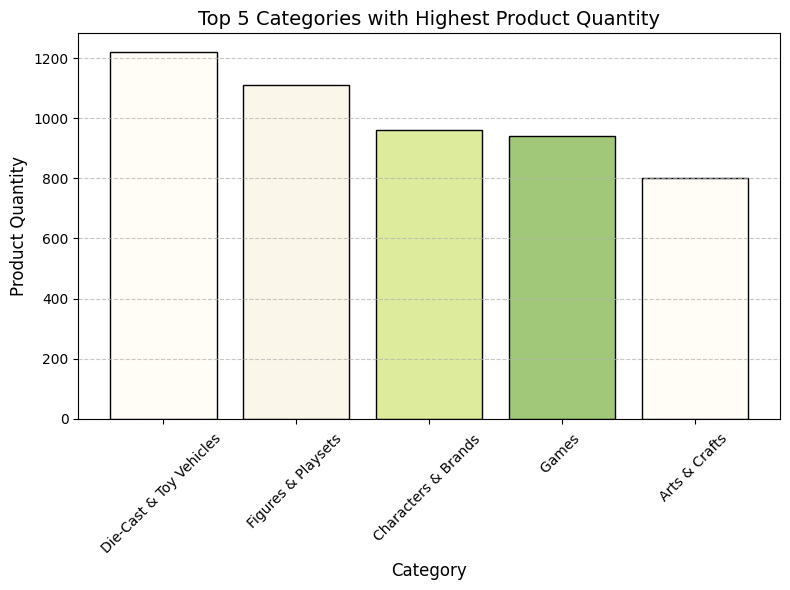

In [ ]:
import matplotlib.pyplot as plt

df2 = (
    df.groupby('Category')['product_name']
      .count()
      .reset_index()
      .sort_values(by='product_name', ascending=False)
      .iloc[1:6]
)

base_colors = ["#FFFDF6", "#FAF6E9", "#DDEB9D", "#A0C878"]
colors = (base_colors * ((len(df2) // len(base_colors)) + 1))[:len(df2)]

plt.figure(figsize=(8, 6))
plt.bar(df2['Category'], df2['product_name'], color=colors, edgecolor='black')
plt.title('Top 5 Categories with Highest Product Quantity', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Product Quantity', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


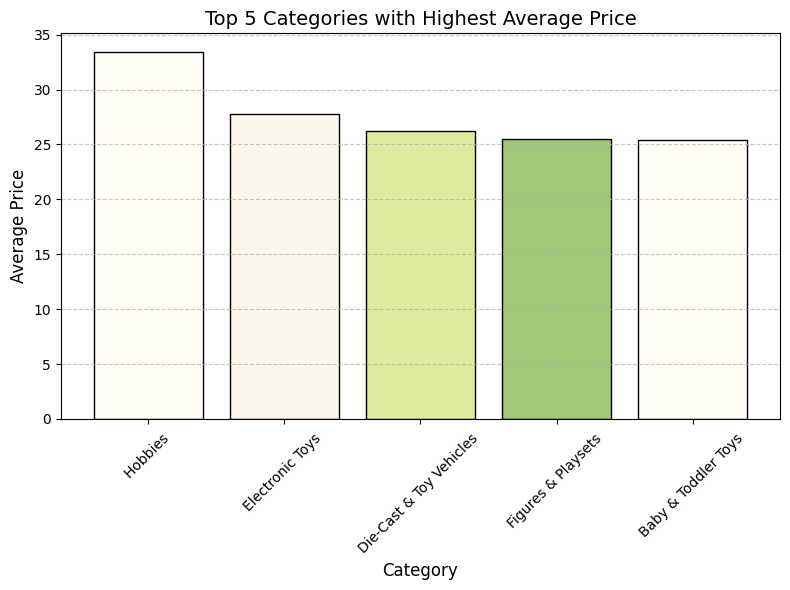

In [ ]:
df2 = (
    df.groupby('Category')['price']
      .mean()
      .reset_index()
      .sort_values(by='price', ascending=False)
      .iloc[1:6]
)

base_colors = ["#FFFDF6", "#FAF6E9", "#DDEB9D", "#A0C878"]
colors = (base_colors * ((len(df2) // len(base_colors)) + 1))[:len(df2)]

# Plot
plt.figure(figsize=(8, 6))
plt.bar(df2['Category'], df2['price'], color=colors, edgecolor='black')
plt.title('Top 5 Categories with Highest Average Price', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


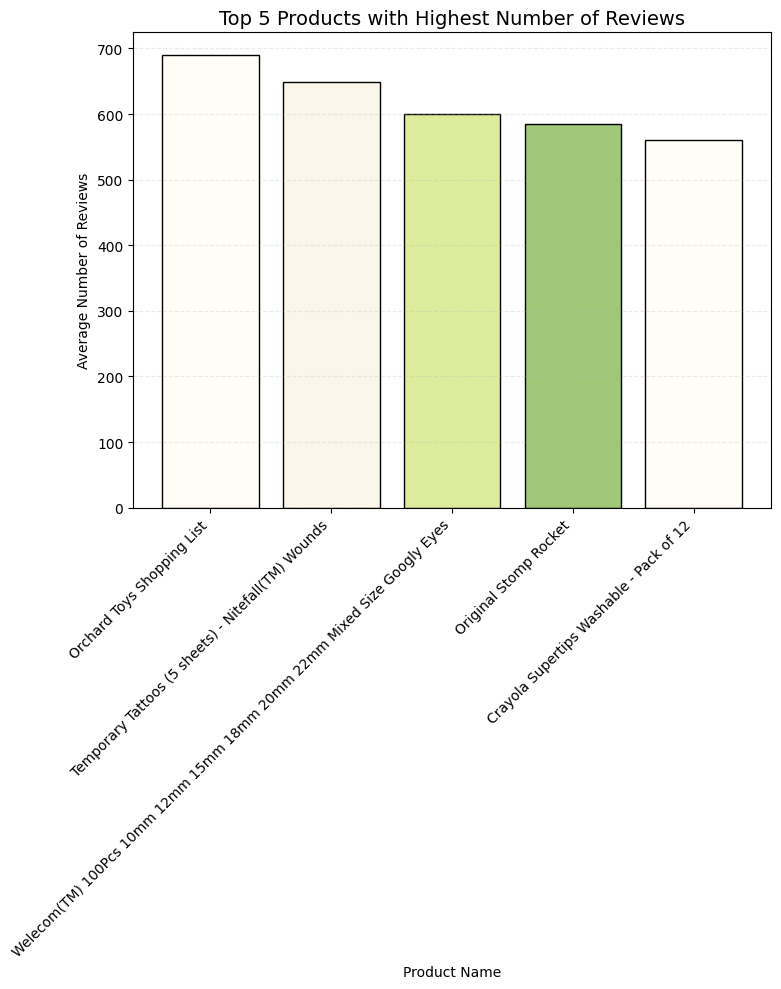

In [ ]:
df2 = (
    df.groupby('product_name')['number_of_reviews']
      .mean()
      .reset_index()
)
top_5_products = df2.sort_values(by='number_of_reviews', ascending=False).iloc[1:6]

base_colors = ["#FFFDF6", "#FAF6E9", "#DDEB9D", "#A0C878"]
colors = (base_colors * ((len(top_5_products) // len(base_colors)) + 1))[:len(top_5_products)]

plt.figure(figsize=(8, 10))
bars = plt.bar(
    top_5_products['product_name'],
    top_5_products['number_of_reviews'],
    color=colors,
    edgecolor='black'
)

plt.title('Top 5 Products with Highest Number of Reviews', fontsize=14)
plt.xlabel('Product Name', fontsize=10)
plt.ylabel('Average Number of Reviews', fontsize=10)
plt.xticks(
    ticks=range(len(top_5_products)),
    labels=top_5_products['product_name'],
    rotation=45,
    ha='right',
    fontsize=10
)
plt.grid(axis='y', linestyle='--', alpha=0.25)
plt.tight_layout()
plt.show()

In [ ]:
df.head()

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,customers_who_bought_this_item_also_bought,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers,product_state_in_stock,Category,Sub_category_1,Sub_category_2,Sub_category_3,Sub_category_4
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,3.42,5,15,1.0,4.9,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ...",new,Hobbies,Model Trains & Railway Sets,Rail Vehicles,Trains,NaN
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,16.99,0,2,1.0,4.5,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ...",0,Hobbies,Model Trains & Railway Sets,Rail Vehicles,Trains,NaN
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,9.99,2,17,2.0,3.9,http://www.amazon.co.uk/Classic-Train-Lights-B...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel...",new,Hobbies,Model Trains & Railway Sets,Rail Vehicles,Trains,NaN
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,39.99,0,1,2.0,5.0,unknown,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,unknown,unknown,I love it // 5.0 // 22 July 2013 // By\n \n...,unknown,0,Hobbies,Model Trains & Railway Sets,Rail Vehicles,Trains,NaN
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,32.19,0,3,2.0,4.7,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,unknown,Birthday present // 5.0 // 14 April 2014 // By...,unknown,0,Hobbies,Model Trains & Railway Sets,Rail Vehicles,Trains,NaN


#### Nhóm chỉ số về tương tác và hành vi người mua


In [ ]:
print("Question Engagement", df[df['number_of_answered_questions'] > 0]['uniq_id'].shape[0] / df['uniq_id'].shape[0])

Question Engagement 0.9235


<Figure size 800x1000 with 0 Axes>

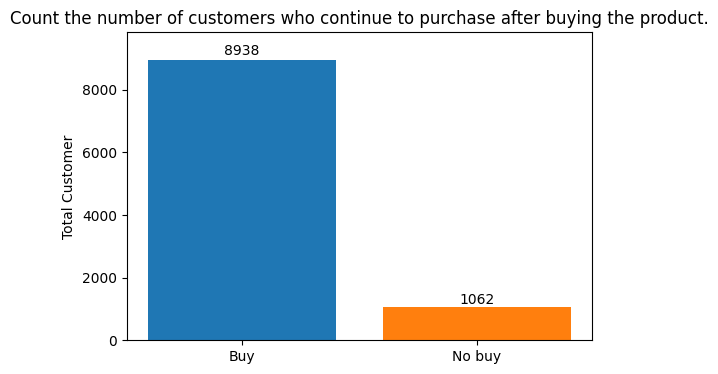

In [ ]:
# Cross sell count
count_no_followup = df['customers_who_bought_this_item_also_bought'][df['customers_who_bought_this_item_also_bought'] == 'unknown'].shape[0]
count_followup = df['customers_who_bought_this_item_also_bought'][df['customers_who_bought_this_item_also_bought'] != 'unknown'].shape[0]

plt.figure(figsize=(8, 10))

labels = ['Buy', 'No buy']
values = [count_followup, count_no_followup]

plt.figure(figsize=(6, 4))
bars = plt.bar(labels, values, color=['#1f77b4', '#ff7f0e'])
plt.title('Count the number of customers who continue to purchase after buying the product.')
plt.ylabel('Total Customer')

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height*1.01,
        f'{height}',
        ha='center',
        va='bottom'
    )

plt.ylim(0, max(values)*1.1)
plt.show()

Nhận xét:
- Sau khi mua một sp thì khách hàng có xu hướng mua thêm một sản phẩm khác cao hơn nhiều lần so với không mua nữa.
- Tỉ lệ cross sell khá lớn => Sản phẩm có nhiều liên kết vs sp khác.

<Figure size 800x1000 with 0 Axes>

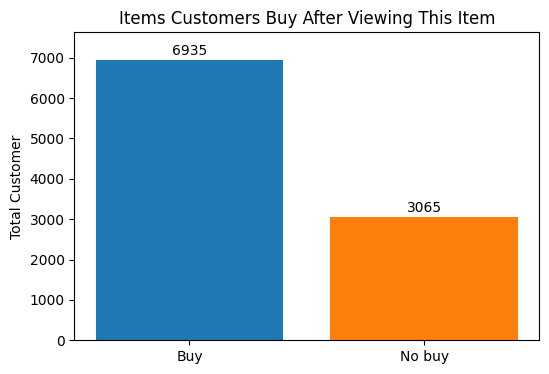

In [ ]:
# Next Product Rate (NPR)
count_no_followup = df['items_customers_buy_after_viewing_this_item'][df['items_customers_buy_after_viewing_this_item'] == 'unknown'].shape[0]
count_followup = df['items_customers_buy_after_viewing_this_item'][df['items_customers_buy_after_viewing_this_item'] != 'unknown'].shape[0]

plt.figure(figsize=(8, 10))

labels = ['Buy', 'No buy']
values = [count_followup, count_no_followup]

plt.figure(figsize=(6, 4))
bars = plt.bar(labels, values, color=['#1f77b4', '#ff7f0e'])
plt.title('Items Customers Buy After Viewing This Item')
plt.ylabel('Total Customer')

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height*1.01,
        f'{height}',
        ha='center',
        va='bottom'
    )

plt.ylim(0, max(values)*1.1)
plt.show()

Nhận xét:
- Tỉ lệ chuyển sang sản phẩm khác gấp hai lần so với không mua sp khác => Khách hàng đa số bị hấp dẫn bởi những sản phẩm có liên quan.
- Khách hàng có xu hướng xem xét, lựa chọn so sánh các sản phẩm kĩ càng.

#### Chỉ số về trạng thái kho và giá

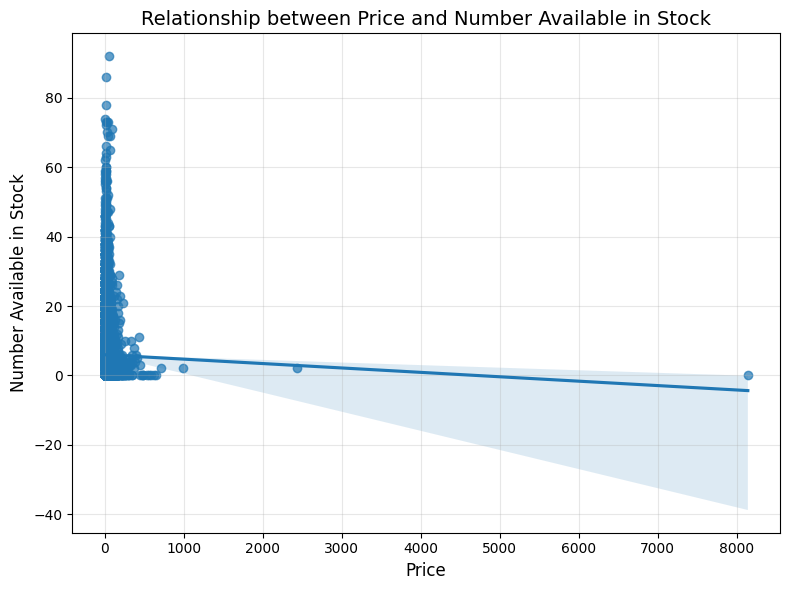

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.regplot(x='price', y='number_available_in_stock', data=df, scatter_kws={'alpha':0.7})
plt.title('Relationship between Price and Number Available in Stock', fontsize=14)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Number Available in Stock', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In-stock rate =  75.0 %
Average Stock =  5.95915295062224
-----------------------------------------------------------------------


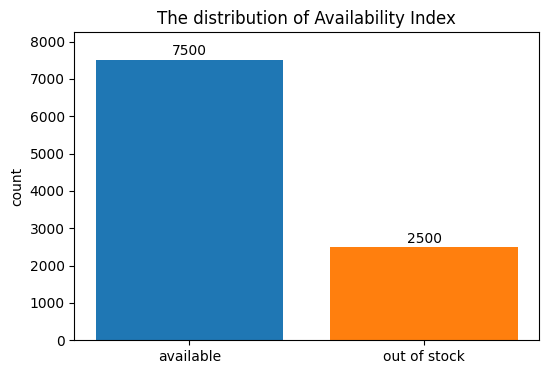

In [ ]:
#Mức độ sẵn sàng hàng (Availability Index)
no_avai = df['number_available_in_stock'][df['number_available_in_stock'] == 0].shape[0]
avai = df['number_available_in_stock'][df['number_available_in_stock'] != 0].shape[0]

print("In-stock rate = ", avai / (no_avai + avai) * 100, "%")
print("Average Stock = ", np.sum(df['number_available_in_stock']) / (df['product_name'].nunique()))
print('-----------------------------------------------------------------------')

labels = ['available', 'out of stock']
values = [avai, no_avai]

plt.figure(figsize=(6, 4))
bars = plt.bar(labels, values, color=['#1f77b4', '#ff7f0e'])
plt.title('The distribution of Availability Index')
plt.ylabel('count')

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height*1.01,
        f'{height}',
        ha='center',
        va='bottom'
    )

plt.ylim(0, max(values)*1.1)
plt.show()

Nhận xét:
- 75% sản phẩm còn hàng trong kho.
- Trung bình cứ 1 sản phẩm thì còn 6 mặt hàng.

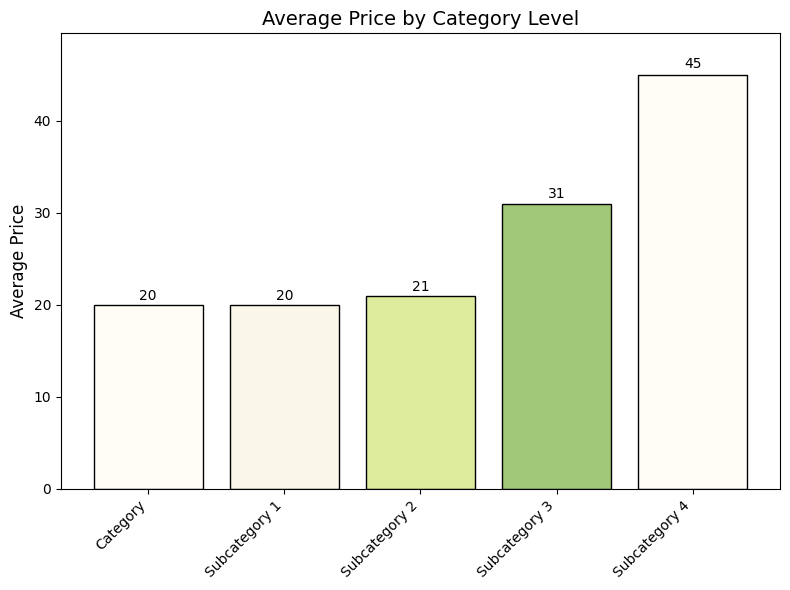

In [ ]:
avg_price_by_category     = round(df[df['Category']        != 'unknown']['price'].mean())
avg_price_by_Sub_category_1 = round(df[df['Sub_category_1'] != 'unknown']['price'].mean())
avg_price_by_Sub_category_2 = round(df[df['Sub_category_2'] != 'unknown']['price'].mean())
avg_price_by_Sub_category_3 = round(df[df['Sub_category_3'] != 'unknown']['price'].mean())
avg_price_by_Sub_category_4 = round(df[df['Sub_category_4'] != 'unknown']['price'].mean())

labels = [
    'Category',
    'Subcategory 1',
    'Subcategory 2',
    'Subcategory 3',
    'Subcategory 4'
]
values = [
    avg_price_by_category,
    avg_price_by_Sub_category_1,
    avg_price_by_Sub_category_2,
    avg_price_by_Sub_category_3,
    avg_price_by_Sub_category_4
]

# Your custom palette
base_colors = ["#FFFDF6", "#FAF6E9", "#DDEB9D", "#A0C878"]
# Repeat/trim palette to match number of bars
colors = (base_colors * ((len(labels) // len(base_colors)) + 1))[:len(labels)]

plt.figure(figsize=(8, 6))
bars = plt.bar(labels, values, color=colors, edgecolor='black')

plt.title('Average Price by Category Level', fontsize=14)
plt.ylabel('Average Price', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Annotate each bar with its value
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height * 1.01,
        f'{height}',
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.ylim(0, max(values) * 1.1)
plt.tight_layout()
plt.show()

#### Chỉ số về người bán (Sellers)

In [ ]:
seller.head()

,uniq_id,seller_name,seller_price
0,eac7efa5dbd3d667f26eb3d3ab504464,Amazon.co.uk,3.42
1,eac7efa5dbd3d667f26eb3d3ab504464,**stop-&-shop-uk**,0.19
2,eac7efa5dbd3d667f26eb3d3ab504464,World Wide Shopping Mall Ltd,9.99
3,eac7efa5dbd3d667f26eb3d3ab504464,MyHobbyStore Retail,8.00
4,eac7efa5dbd3d667f26eb3d3ab504464,francejouet,37.62


In [ ]:
seller_metrics = seller.groupby('uniq_id').agg(
    Number_of_Sellers=('seller_name', 'nunique'),
    Min_Price=('seller_price', 'min'),
    Max_Price=('seller_price', 'max'),
    Average_Price=('seller_price', 'mean')
).reset_index()

seller_metrics['Price_Range'] = seller_metrics['Max_Price'] - seller_metrics['Min_Price']
seller_metrics.head()

,uniq_id,Number_of_Sellers,Min_Price,Max_Price,Average_Price,Price_Range
0,0016eb63fa6c7a5e8930bc7732b13116,10,48.98,106.00,67.519000,57.02
1,00182f9b6081e58fea1fe76bc13eb022,3,19.99,24.99,22.506667,5.00
2,0030f5965cbd07a138147425b9a0156c,3,6.53,14.99,9.373333,8.46
3,0034d77b68130bba71aca6e733c7e1ac,3,30.23,148.69,92.970000,118.46
4,0039295c7fcefba10d5fc333eff806d3,10,153.63,216.64,199.337000,63.01


In [ ]:
seller_metrics.to_csv("/content/drive/MyDrive/Course DA/Final Project/seller_metrics.csv", index = False)

In [ ]:
seller_metrics = pd.read_csv("/content/drive/MyDrive/Course DA/Final Project/seller_metrics.csv")
seller_metrics.head()

,uniq_id,Number_of_Sellers,Min_Price,Max_Price,Average_Price,Price_Range
0,0016eb63fa6c7a5e8930bc7732b13116,10,48.98,106.00,67.519000,57.02
1,00182f9b6081e58fea1fe76bc13eb022,3,19.99,24.99,22.506667,5.00
2,0030f5965cbd07a138147425b9a0156c,3,6.53,14.99,9.373333,8.46
3,0034d77b68130bba71aca6e733c7e1ac,3,30.23,148.69,92.970000,118.46
4,0039295c7fcefba10d5fc333eff806d3,10,153.63,216.64,199.337000,63.01


In [ ]:
seller_metrics['Number_of_Sellers'].value_counts()

,count
Number_of_Sellers,
1,1927
10,1383
2,932
3,739
4,551
5,433
6,314
7,273
8,210


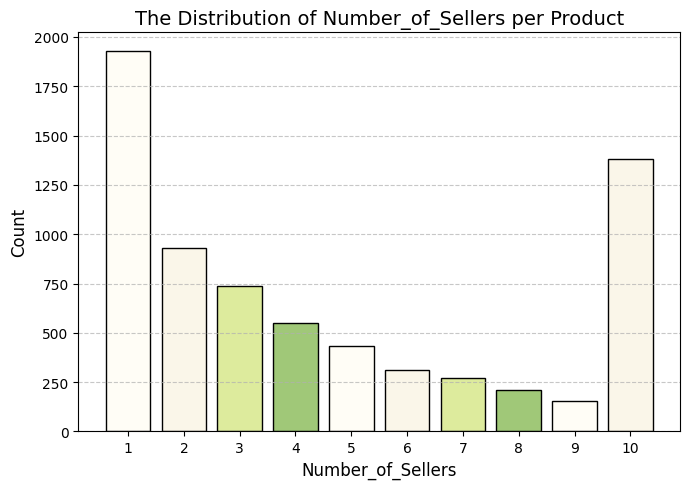

In [ ]:
counts = seller_metrics['Number_of_Sellers'].value_counts().sort_index()

# Define your custom palette and match its length to the number of bars
base_colors = ["#FFFDF6", "#FAF6E9", "#DDEB9D", "#A0C878"]
colors = (base_colors * ((len(counts) // len(base_colors)) + 1))[:len(counts)]

plt.figure(figsize=(7, 5))
plt.bar(
    counts.index,
    counts.values,
    color=colors,
    edgecolor='black'
)
plt.title('The Distribution of Number_of_Sellers per Product', fontsize=14)
plt.xlabel('Number_of_Sellers', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(counts.index, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
print('Average Seller Count (ASC): ', round(sum(seller_metrics['Number_of_Sellers']) / seller_metrics['uniq_id'].nunique()))

Average Seller Count (ASC):  4


Nhận xét:
- Số sản phẩm được bán độc quyền là cao nhất và giảm dần theo số lượng người bán. Nhưng số lượng sản phẩm có 10 người cạnh tranh nhau đứng thứ 2.
=> Thị trường bán sản phẩm có mức cạnh tranh trung bình cứ 1 sản phẩm sẽ có 4 người bán.


#### Chỉ số về đánh giá của khách hàng

In [ ]:
customer_review.head()

,uniq_id,title,rating,date,reviewer_name,review_content,year,review_content_clean
0,eac7efa5dbd3d667f26eb3d3ab504464,Worth Buying Pictures Alone Ever,4.0,6 April 2014,By Copnovelist,Part of the magic for me growing up as a boy w...,2014,"['part magic', 'magic growing', 'growing boy',..."
1,eac7efa5dbd3d667f26eb3d3ab504464,Amazing detail fabulous photography,5.0,11 April 2015,By richard,"Amazing detail, every credit to the photograph...",2015,"['amazing detail', 'detail every', 'every cred..."
2,eac7efa5dbd3d667f26eb3d3ab504464,Great Purchase,5.0,23 April 2014,By Pinkhandbag,This was purchased on behalf of my Dad. He is ...,2014,"['purchased behalf', 'behalf dad', 'dad always..."
3,eac7efa5dbd3d667f26eb3d3ab504464,Great Catalogue,5.0,11 Jun. 2014,By Gary John Maps,Everything I really needed to see what was on ...,2014,"['everything really', 'really needed', 'needed..."
4,eac7efa5dbd3d667f26eb3d3ab504464,collect glossy pictures great nice still get,5.0,7 Dec. 2014,By David Baker,I collect them all as the glossy pictures are ...,2014,"['collect glossy', 'glossy pictures', 'picture..."


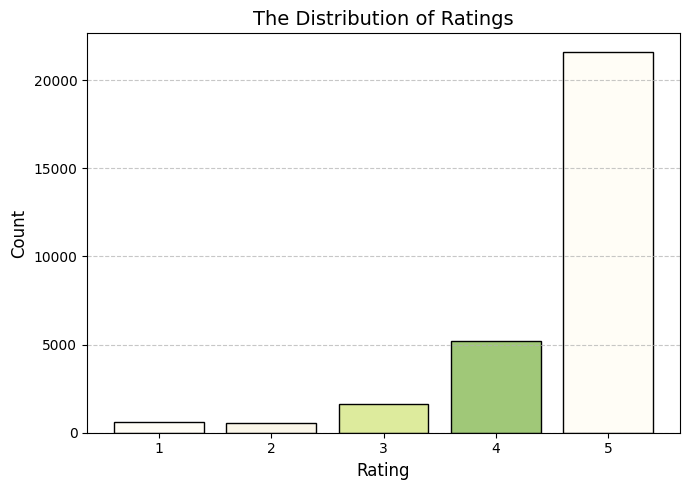

In [ ]:
counts = customer_review['rating'].value_counts().sort_index()

base_colors = ["#FFFDF6", "#FAF6E9", "#DDEB9D", "#A0C878"]
colors = (base_colors * ((len(counts) // len(base_colors)) + 1))[:len(counts)]

plt.figure(figsize=(7, 5))
plt.bar(
    counts.index,
    counts.values,
    color=colors,
    edgecolor='black'
)
plt.title('The Distribution of Ratings', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(counts.index, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Nhận xét:
- Đa số khách hàng hài lòng với chất lượng sản phẩm (5 sao chiếm đa số)

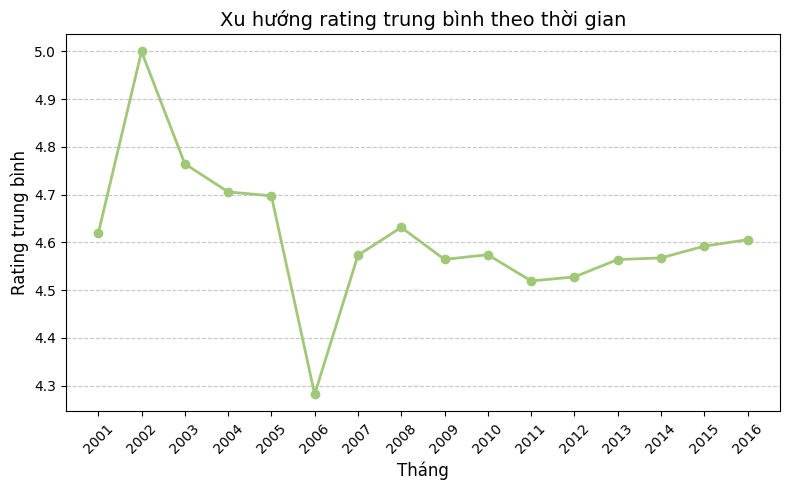

In [ ]:
#customer_review['date'].replace(".", "", inplace = True)
#customer_review['year'] = customer_review['date'].apply(lambda x: x.split()[-1])

rating_by_month = customer_review.groupby('year')['rating'].mean().reset_index()

plt.figure(figsize=(8, 5))
plt.plot(
    rating_by_month['year'].astype(str),
    rating_by_month['rating'],
    marker='o',
    color="#A0C878",
    linewidth=2
)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.title('Xu hướng rating trung bình theo thời gian', fontsize=14)
plt.xlabel('Tháng', fontsize=12)
plt.ylabel('Rating trung bình', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Nhận xét:
- Rating của toàn bộ sản phẩm bắt đầu từ năm 2001 là xấp xỉ 4.6 và tăng đến mức độ tối đa vào năm 2002.
- Đạt mức thấp nhất vào năm 2006, khoảng 4.3 sao. Sau đó, duy trì mức ổn định như lúc ban đầu. \
=> Nhìn chung, Amazon có sản phẩm khá tốt, đánh giá theo các năm giao động [4.3, 5.0].

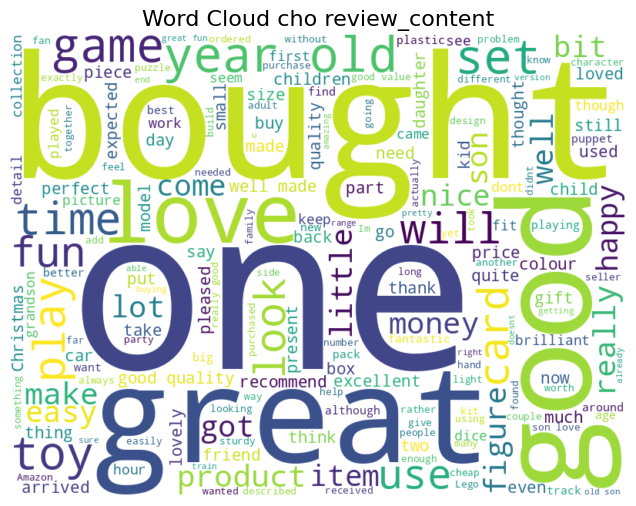

In [ ]:
customer_review['review_content_clean'] = customer_review['review_content'].apply(
    lambda x: re.sub(r'[^a-zA-Z\s]', '', str(x))
)
customer_review['review_content_clean'] = customer_review['review_content_clean'].fillna('')

text = " ".join(customer_review['review_content_clean'])

stopwords = set(STOPWORDS)

wordcloud = WordCloud(
    width=800,
    height=600,
    background_color='white',
    stopwords=stopwords,
    min_font_size=10
).generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud cho review_content", fontsize=16)
plt.show()

### Product KPIs

In [ ]:
seller_metrics.head()

,uniq_id,Number_of_Sellers,Min_Price,Max_Price,Average_Price,Price_Range
0,0016eb63fa6c7a5e8930bc7732b13116,10,48.98,106.00,67.519000,57.02
1,00182f9b6081e58fea1fe76bc13eb022,3,19.99,24.99,22.506667,5.00
2,0030f5965cbd07a138147425b9a0156c,3,6.53,14.99,9.373333,8.46
3,0034d77b68130bba71aca6e733c7e1ac,3,30.23,148.69,92.970000,118.46
4,0039295c7fcefba10d5fc333eff806d3,10,153.63,216.64,199.337000,63.01


In [ ]:
df.head()

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,customers_who_bought_this_item_also_bought,product_information,...,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers,product_state_in_stock,Category,Sub_category_1,Sub_category_2,Sub_category_3,Sub_category_4
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,3.42,5,15.0,1.0,4.9,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Technical Details Item Weight640 g Product Dim...,...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ...",new,Hobbies,Model Trains & Railway Sets,Rail Vehicles,Trains,unknown
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,16.99,0,2.0,1.0,4.5,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Technical Details Manufacturer recommended age...,...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ...",0,Hobbies,Model Trains & Railway Sets,Rail Vehicles,Trains,unknown
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,9.99,2,17.0,2.0,3.9,http://www.amazon.co.uk/Classic-Train-Lights-B...,Technical Details Manufacturer recommended age...,...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel...",new,Hobbies,Model Trains & Railway Sets,Rail Vehicles,Trains,unknown
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,39.99,0,1.0,2.0,5.0,unknown,Technical Details Item Weight259 g Product Dim...,...,unknown,unknown,I love it // 5.0 // 22 July 2013 // By\n \n...,unknown,0,Hobbies,Model Trains & Railway Sets,Rail Vehicles,Trains,unknown
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,32.19,0,3.0,2.0,4.7,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,Technical Details Item Weight159 g Product Dim...,...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,unknown,Birthday present // 5.0 // 14 April 2014 // By...,unknown,0,Hobbies,Model Trains & Railway Sets,Rail Vehicles,Trains,unknown


In [ ]:
print("Average product price:", round(seller_metrics['Average_Price'].mean()))

Average product price: 32


In [ ]:
print(f"Stock Availability {df[df['number_available_in_stock'] > 0].shape[0] / df.shape[0] * 100}%")

Stock Availability 75.0%


In [ ]:
print("Average Review Rating", round(df['average_review_rating'].mean(), 2))

Average Review Rating 4.71


In [ ]:
print(f"Average number of reviews: {round(df['number_of_reviews'].mean(), 0)}")
print(f"Average number of answered questions: {round(df['number_of_answered_questions'].mean(), 0)}")

Average number of reviews: 9.0
Average number of answered questions: 2.0


In [ ]:
df['product_state_in_stock'].value_counts().values

array([7324, 2500,  161,   13,    2])

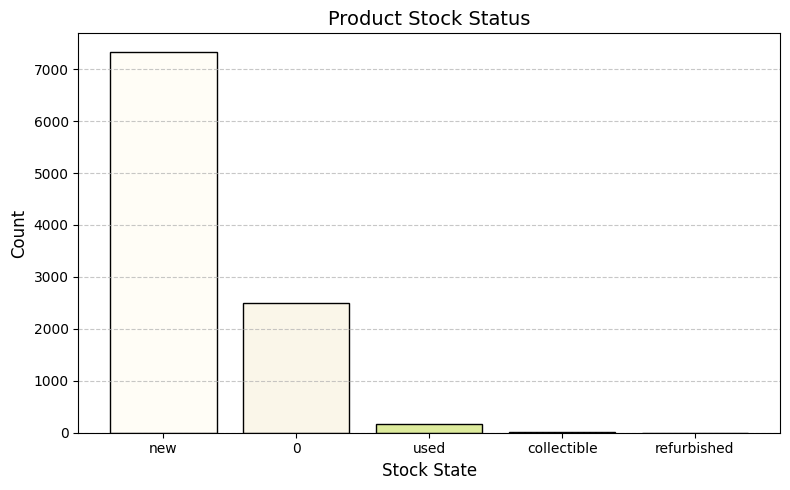

In [ ]:
base_colors = ["#FFFDF6", "#FAF6E9", "#DDEB9D", "#A0C878"]

stock_counts = df['product_state_in_stock'].value_counts()

colors = base_colors[:len(stock_counts)]

plt.figure(figsize=(8, 5))
plt.bar(
    stock_counts.index,
    stock_counts.values,
    color=colors,
    edgecolor='black'
)
plt.title('Product Stock Status', fontsize=14)
plt.xlabel('Stock State', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

### Phân tích nhiều cột

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Course DA/Final Project/Final/data/mormalized_data.csv")
customer_review = pd.read_csv('/content/drive/MyDrive/Course DA/Final Project/Final/data/customer_review.csv')
seller = pd.read_csv('/content/drive/MyDrive/Course DA/Final Project/Final/data/seller.csv')

In [ ]:
df.head()

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,customers_who_bought_this_item_also_bought,product_information,...,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers,product_state_in_stock,Category,Sub_category_1,Sub_category_2,Sub_category_3,Sub_category_4
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,3.42,5,15.0,1.0,4.9,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Technical Details Item Weight640 g Product Dim...,...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ...",new,Hobbies,Model Trains & Railway Sets,Rail Vehicles,Trains,unknown
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,16.99,0,2.0,1.0,4.5,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Technical Details Manufacturer recommended age...,...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ...",0,Hobbies,Model Trains & Railway Sets,Rail Vehicles,Trains,unknown
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,9.99,2,17.0,2.0,3.9,http://www.amazon.co.uk/Classic-Train-Lights-B...,Technical Details Manufacturer recommended age...,...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel...",new,Hobbies,Model Trains & Railway Sets,Rail Vehicles,Trains,unknown
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,39.99,0,1.0,2.0,5.0,unknown,Technical Details Item Weight259 g Product Dim...,...,unknown,unknown,I love it // 5.0 // 22 July 2013 // By\n \n...,unknown,0,Hobbies,Model Trains & Railway Sets,Rail Vehicles,Trains,unknown
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,32.19,0,3.0,2.0,4.7,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,Technical Details Item Weight159 g Product Dim...,...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,unknown,Birthday present // 5.0 // 14 April 2014 // By...,unknown,0,Hobbies,Model Trains & Railway Sets,Rail Vehicles,Trains,unknown


In [ ]:
customer_review.head()

,uniq_id,title,rating,date,reviewer_name,review_content,year,review_content_clean
0,eac7efa5dbd3d667f26eb3d3ab504464,Worth Buying Pictures Alone Ever,4.0,6 April 2014,By Copnovelist,Part of the magic for me growing up as a boy w...,2014,Part magic growing boy buy given new Hornby ca...
1,eac7efa5dbd3d667f26eb3d3ab504464,Amazing detail fabulous photography,5.0,11 April 2015,By richard,"Amazing detail, every credit to the photograph...",2015,Amazing detail every credit photographer book ...
2,eac7efa5dbd3d667f26eb3d3ab504464,Great Purchase,5.0,23 April 2014,By Pinkhandbag,This was purchased on behalf of my Dad. He is ...,2014,purchased behalf Dad always asking look 00 gau...
3,eac7efa5dbd3d667f26eb3d3ab504464,Great Catalogue,5.0,11 Jun. 2014,By Gary John Maps,Everything I really needed to see what was on ...,2014,Everything really needed see offer Hornby way ...
4,eac7efa5dbd3d667f26eb3d3ab504464,collect glossy pictures great nice still get,5.0,7 Dec. 2014,By David Baker,I collect them all as the glossy pictures are ...,2014,collect glossy pictures great nice still get c...


In [ ]:
seller.head()

,uniq_id,seller_name,seller_price
0,eac7efa5dbd3d667f26eb3d3ab504464,Amazon.co.uk,3.42
1,eac7efa5dbd3d667f26eb3d3ab504464,**stop-&-shop-uk**,0.19
2,eac7efa5dbd3d667f26eb3d3ab504464,World Wide Shopping Mall Ltd,9.99
3,eac7efa5dbd3d667f26eb3d3ab504464,MyHobbyStore Retail,8.00
4,eac7efa5dbd3d667f26eb3d3ab504464,francejouet,37.62


In [ ]:
df_merge = df.merge(customer_review, on = 'uniq_id', how = 'left') \
  .merge(seller, on = 'uniq_id', how = 'left')

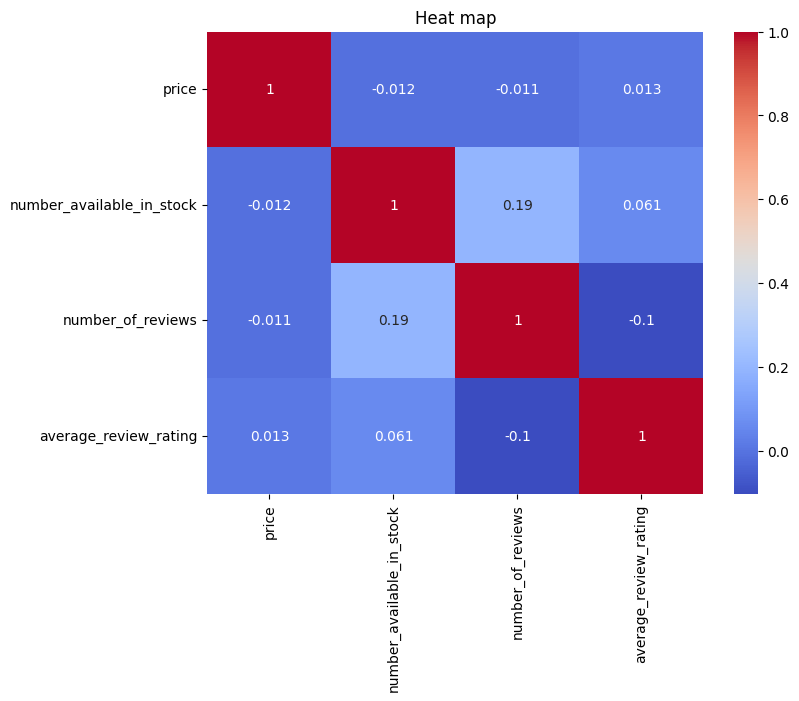

In [ ]:
numeric_columns = ['price', 'number_available_in_stock', 'number_of_reviews',
                   'average_review_rating']

df_numeric = df_merge[numeric_columns].apply(pd.to_numeric, errors='coerce')

corr_matrix = df_numeric.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Heat map")
plt.show()

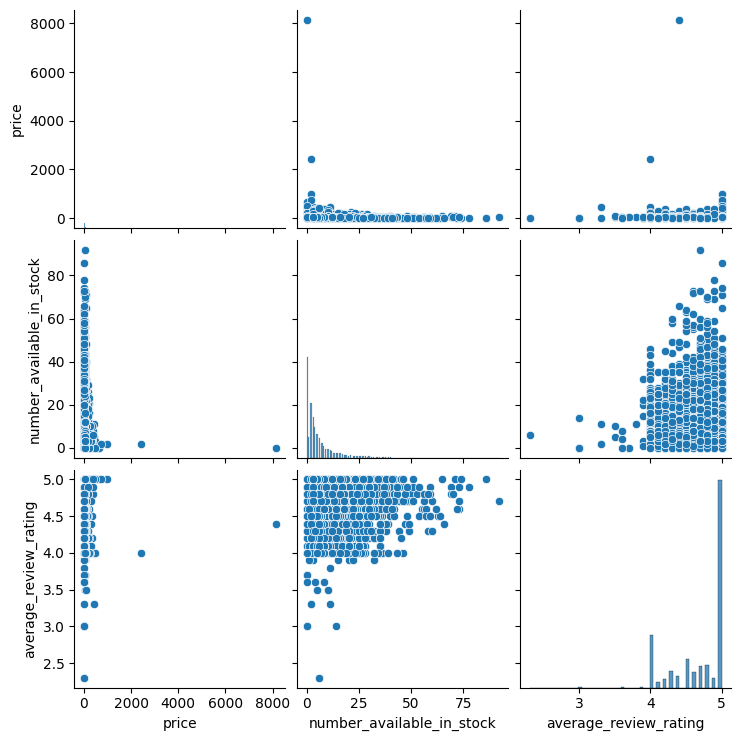

In [ ]:
sns.pairplot(df[numeric_columns])
plt.show()

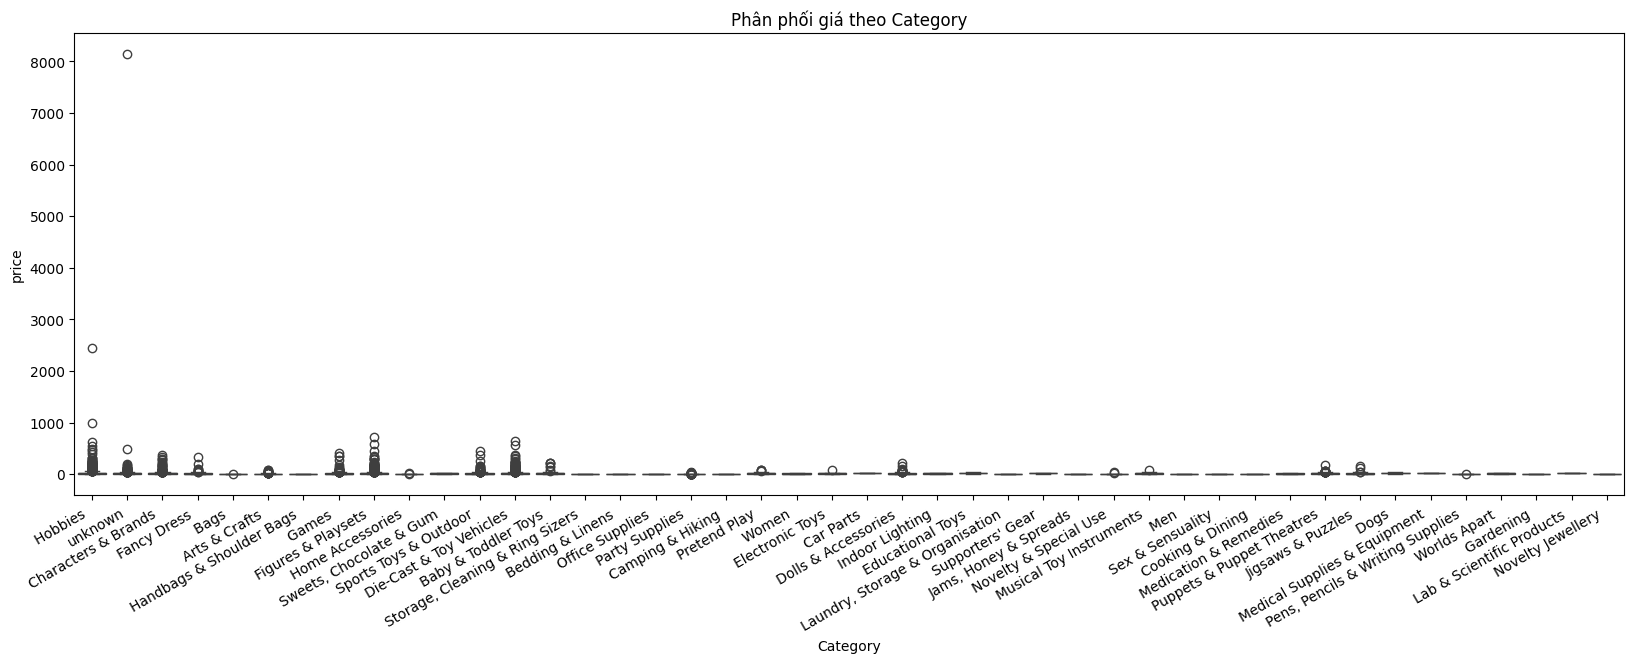

In [ ]:
plt.figure(figsize=(20, 6))
sns.boxplot(x='Category', y='price', data=df)
plt.title('Phân phối giá theo Category')
plt.xticks(rotation=30, ha='right', fontsize=10)
plt.show()

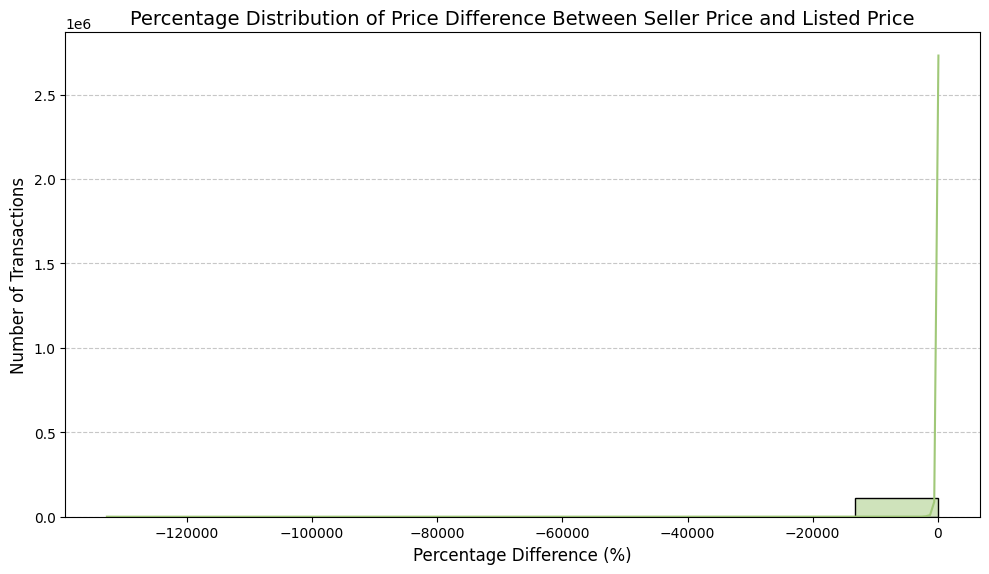

In [ ]:
df_merge['price_difference'] = df_merge['price'] - df_merge['seller_price']
df_merge['percent_difference'] = (df_merge['price_difference'] / df_merge['price']) * 100

plt.figure(figsize=(10, 6))
sns.histplot(
    df_merge['percent_difference'],
    bins=10,
    kde=True,
    color="#A0C878",
    edgecolor='black'
)
plt.title("Percentage Distribution of Price Difference Between Seller Price and Listed Price", fontsize=14)
plt.xlabel("Percentage Difference (%)", fontsize=12)
plt.ylabel("Number of Transactions", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Nhận xét: Nếu phần trăm chênh lệch có giá trị âm: Người bán đang bán với giá thấp hơn giá niêm yết, có thể cho thấy cạnh tranh về giá, khuyến khích khách hàng mua bằng giá ưu đãi.